# Non-uniform structured grid

In fluid mechanics and heat transfer, the solution often contains regions of large gradients and regions of small gradients. In cases where both regions are well localized, computational efficiency favors clustering computational nodes in regions of large gradients and mapping regions of small gradients with coarse meshes. This notebook described a common method to define a non-uniform grid for a symmetrical problem, with the finest resolution at the two ends of the domain, e.g. channel flow.

## Grid transformation

Consider a domain $[-H/2,+H/2]$ discretized with $N$ points. The location of computational nodes on a uniform grid is defined as:

$$
\tilde{y}_j = -h + j\Delta \text{ with }\Delta = \frac{2h}{N-1}\text{ and }j\in[0,N-1] 
$$
where $h=H/2$.

The common approach to create a non-uniform grid is to operate a transform function over the uniform grid. For a channel flow, one such function is:

$$
y_j = h\frac{\tanh\gamma \tilde{y}_j}{\tanh\gamma h}
$$

The coefficient $\gamma$ controls the stretching of the grid, in this case the minimum mesh size, which is at the wall.

### Python set-up and useful functions

In [1]:
%matplotlib inline 
# plots graphs within the notebook

from IPython.display import display,Image, Latex
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

import numericaltools as numtools


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py


import sympy as sym




class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }


from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)


## Example

Create a grid for $H=2$, $N=33$, and $\Delta_{min}=0.001$





Stretching coefficient gamma: 4.8624e+00


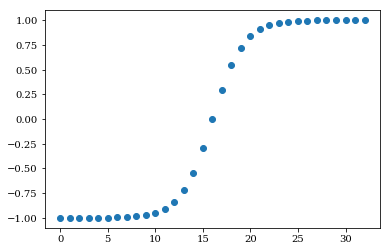

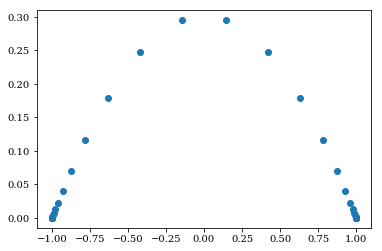

In [7]:
H = 2
N = 33
Deltamin = 0.0001
gamma_guess = 2
y,gamma = numtools.stretched_mesh(H,N,Deltamin,gamma_guess)
print("Stretching coefficient gamma: %1.4e" %gamma)
plt.plot(y,'o')
plt.show()
plt.plot(0.5*(y[1:]+y[:-1]),y[1:]-y[:-1],'o')
plt.show()



## Grid generation at fixed $\gamma$

$H=2$, $N=257$, $\gamma = 2.6$

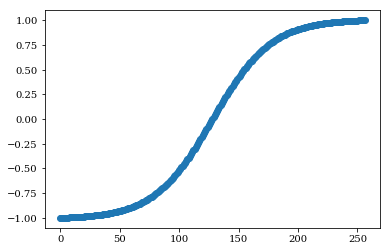

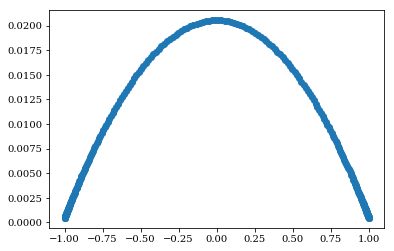

Deltamin = 4.5736e-04


In [8]:
H = 2.
h = H/2
N =257
gamma = 2.6
y_uni = np.linspace(-h,h,N)
y = h*np.tanh(gamma*y_uni)/np.tanh(gamma*h)
plt.plot(y,'o')
plt.show()
plt.plot(0.5*(y[1:]+y[:-1]),y[1:]-y[:-1],'o')
plt.show()
print("Deltamin = %1.4e" %(y[1]-y[0]))

## Generate a bunch of grids with different $N$ but constant $\Delta_{min}$

In [11]:
H = 2
deltamin = 5e-4
gamma_guess = 2.
N_array = np.array([33,65,129,257,513,1025],dtype=int)
gamma_array = np.zeros(len(N_array))
j = 0
for N in N_array:
    y,gamma_array[j] = numtools.stretched_mesh(H,N,Deltamin,gamma_guess)
    gamma_guess = gamma_array[j]
    print("for N=%4i, gamma=%1.4f" %(N,gamma_array[j]))
    
    j += 1
    
print(gamma_array)
    

for N=  33, gamma=4.8624
for N=  65, gamma=4.3730
for N= 129, gamma=3.9348
for N= 257, gamma=3.5145
for N= 513, gamma=3.0970
for N=1025, gamma=2.6734
[4.86238469 4.37303735 3.93484222 3.51452064 3.09698058 2.67343703]


## Generate a bunch of grids at constant $N$ and varying $\Delta_{min}$

In [15]:
Deltamin_array = np.array([1e-2,5e-3,1e-3,5e-4,1e-4])
H = 2 
N = 129
gamma_guess = 2
for Deltamin in Deltamin_array:
    y,gamma = numtools.stretched_mesh(H,N,Deltamin,gamma_guess)
    print("For Dmin=%1.1e, gamma=%1.4f" %(Deltamin,gamma))

For Dmin=1.0e-02, gamma=0.8639
For Dmin=5.0e-03, gamma=1.4658
For Dmin=1.0e-03, gamma=2.5568
For Dmin=5.0e-04, gamma=2.9842
For Dmin=1.0e-04, gamma=3.9348


In [13]:
2/129

0.015503875968992248